Time for wave to move one grid spacing (Courant timestep tc) = 0.02
Wave circles the system in 100.00 steps
2 out of 100 steps completed.
5 out of 100 steps completed.
8 out of 100 steps completed.
11 out of 100 steps completed.
14 out of 100 steps completed.
17 out of 100 steps completed.
20 out of 100 steps completed.
23 out of 100 steps completed.
26 out of 100 steps completed.
29 out of 100 steps completed.
32 out of 100 steps completed.
35 out of 100 steps completed.
38 out of 100 steps completed.
41 out of 100 steps completed.
44 out of 100 steps completed.
47 out of 100 steps completed.
50 out of 100 steps completed.
53 out of 100 steps completed.
56 out of 100 steps completed.
59 out of 100 steps completed.
62 out of 100 steps completed.
65 out of 100 steps completed.
68 out of 100 steps completed.
71 out of 100 steps completed.
74 out of 100 steps completed.
77 out of 100 steps completed.
80 out of 100 steps completed.
83 out of 100 steps completed.
86 out of 100 steps complet

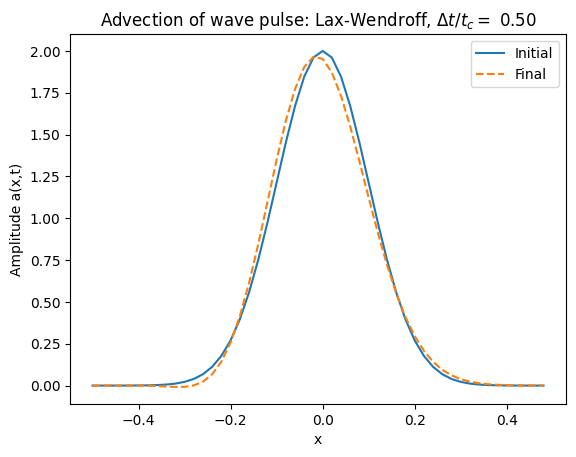

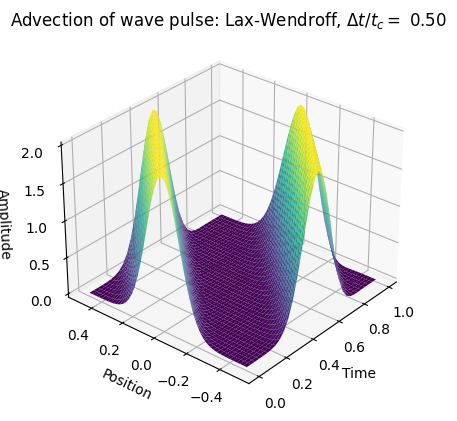

In [1]:
# Set up configuration options and special features
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.animation import FuncAnimation

# Select the numerical parameters (time step, grid spacing, etc.)
# method = eval(
#     input('Choose a numerical method: 1) FTCS; 2) Lax; 3)Lax-Wendroff: '))
method = 3
# N = eval(input('Enter number of grid points: '))
N = 50
L = 1.0  # System size
h = L / N  # Grid spacing
c = 1.0  # Wave speed

# Set up plot titles
if method == 1:  ### FTCS Method ###
    plotlabel = 'FTCS'
elif method == 2:  ### Lax Method ###
    plotlabel = 'Lax'
elif method == 3:  ### Lax-Wendroff Method  ###
    plotlabel = 'Lax-Wendroff'
else:
    raise ValueError(
        'Incorrect index chosen for method. Must choose 1, 2, or 3')

print('Time for wave to move one grid spacing (Courant timestep tc) = {0:.2f}'.
      format(h / c))

tc = h / c
# tau = float(input('Enter time step as a fraction of tc: '))
tau = float(.5)
tau *= tc
coeff = -c * tau / (2.0 * h)  # Coefficient used by all schemes
coefflw = 2 * coeff**2  # Coefficient used by L-W scheme

print('Wave circles the system in {0:.2f} steps'.format(L / (c * tau)))
# nStep = int(input('Enter total number of steps: '))
nStep = int(100)

# Set initial and boundary conditions
sigma = 0.1  # Width of the Gaussian pulses
k_wave = np.pi / sigma  # Wave number of the cosine
x = np.arange(N) * h - L / 2  # Coordinates of the grid points

# Set up initial condition to be a Gaussian-cosine pulse
a = np.empty(N)
for i in range(N):
        a[i] = 2* np.exp(-x[i]**2/(2*sigma**2))
#     a[i] = np.sin(k_wave * (x[i]))

# Use periodic boundary conditions
ip = np.arange(N) + 1
ip[N - 1] = 0  # ip  = i+1 with periodic b.c.
im = np.arange(N) - 1
im[0] = N - 1  # im = i-1 with periodic b.c.

# Initialize plotting variables
iplot = 1  # Plot counter
nplots = 50  # Desired number of plots
aplot = np.empty((N, nplots))
tplot = np.empty(nplots)
aplot[:, 0] = np.copy(a)  # Record the initial state
tplot[0] = 0  # Record the initial time (t = 0)
plotStep = nStep / nplots + 1

# Loop over the desired number of steps
for iStep in range(nStep):  ## MAIN LOOP ##

    # Compute new values of wave amplitude using FTCS, Lax, or Lax-Wendroff method
    if method == 1:  ### FTCS Method ###
        a[:] = a[:] + coeff * (a[ip] - a[im])
    elif method == 2:  ### Lax Method ###
        a[:] = 0.5 * (a[ip] + a[im]) + coeff * (a[ip] - a[im])
    elif method == 3:  ### Lax-Wendroff Method  ###
        a[:] = (a[:] + coeff *
                (a[ip] - a[im])) + coefflw * (a[ip] + a[im] - 2 * a[:])
    else:
        raise ValueError(
            'Incorrect index chosen for method. Must choose 1, 2, or 3')

    # Periodically record a(t) for plotting
    if (iStep + 1) % plotStep < 1:  # Every plot_iter steps record
        aplot[:, iplot] = np.copy(a)
        tplot[iplot] = tau * (iStep + 1)
        iplot += 1
        print('{0:g} out of {1:g} steps completed.'.format(iStep, nStep))

# Plot the initial and final states.
fig, ax = plt.subplots()
ax.set_title(r'Advection of wave pulse: ' + plotlabel +
             ', $\Delta t/t_c = $ {0:.2f}'.format(tau / tc))
ax.plot(x, aplot[:, 0], '-', label='Initial')
ax.plot(x, a, '--', label='Final')
ax.set_xlabel('x')
ax.set_ylabel('Amplitude a(x,t)')
ax.legend()

# Plot the total wave amplitude versus position and time
fig2 = plt.figure()
ax2 = fig2.add_subplot(projection='3d')
ax2.set_title(r'Advection of wave pulse: ' + plotlabel +
              ', $\Delta t/t_c = $ {0:.2f}'.format(tau / tc))
Tp, Xp = np.meshgrid(tplot[0:iplot],
                     x)  # Arrange data into a format suitable for 3D plots.
ax2.plot_surface(Tp,
                 Xp,
                 aplot[:, 0:iplot],
                 rstride=1,
                 cstride=1,
                 cmap=cm.viridis)
ax2.view_init(elev=30., azim=-140.)
ax2.set_ylabel('Position')
ax2.set_xlabel('Time')
ax2.set_zlabel('Amplitude')

plt.show()

In [16]:
N = 100
Nt = 100
h = 2 * np.pi / N
k = 1 / Nt
r = k / (h * h)
time_steps = 200
time = np.arange(0, (time_steps + .5) * k, k)
x = np.arange(0, 2 * np.pi + h / 2, h)

# X, Y = np.meshgrid(x, time)

# fig = plt.figure()
# plt.plot(X, Y, 'ro')
# plt.plot(x, 0 * x, 'bo', label='Initial Condition')
# plt.xlim((-h, 2 * np.pi + h))
# plt.ylim((-k, max(time) + k))
# plt.xlabel('x')
# plt.ylabel('time (ms)')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
# plt.title(r'Discrete Grid $\Omega_h$ ', fontsize=24, y=1.08)
# plt.show()

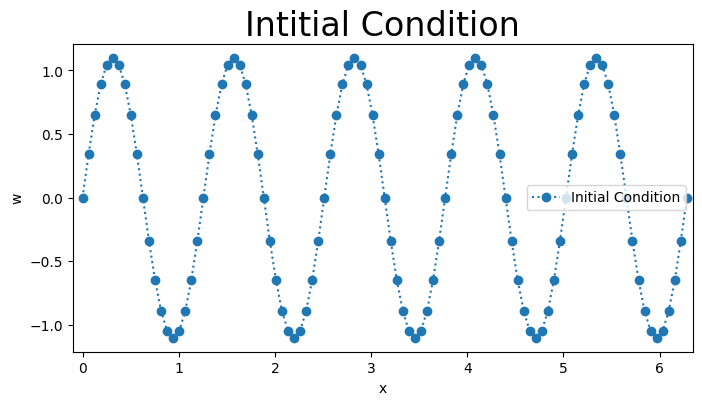

In [17]:
w = np.zeros((N + 1, time_steps + 1))
b = np.zeros(N - 1)

n = 5
# const = n*np.pi/2
const = 0
amp = 5
# Initial Condition
for i in range(0, N + 1):
#     w[i, 0] = 2 * np.sin(n*x[i] - const) * np.cos(n*x[i] - const)
    w[i, 0] = 1.1*np.sin(n*x[i] - const)
#     w[i, 0] = 2* np.exp(-x[i]**2/(2*sigma**2))
#     w[i, 0] = amp * np.sin(x[i] - const)

fig = plt.figure(figsize=(8, 4))

plt.plot(x, w[:, 0], 'o:', label='Initial Condition')
plt.xlim([-0.1, max(x) + h])
plt.title('Intitial Condition', fontsize=24)
plt.xlabel('x')
plt.ylabel('w')
plt.legend(loc='best')
plt.show()
ipos = np.zeros(N + 1)
ineg = np.zeros(N + 1)

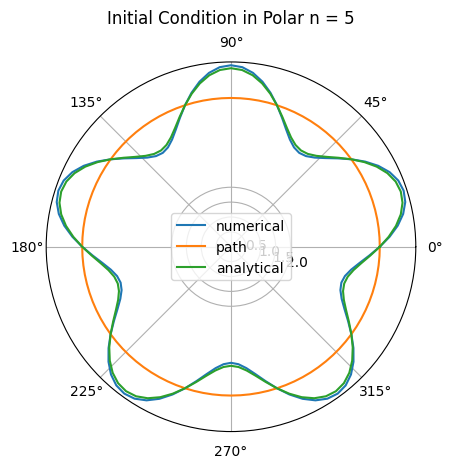

In [18]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(x, amp + w[:, 0], label = 'numerical')
ax.plot(x, amp*np.ones(len(x)), label = 'path')
ax.plot(x, amp + np.sin(n*x), label = 'analytical')
# ax.set_rmax(2)
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.legend()

ax.set_title(f"Initial Condition in Polar n = {n}", va='bottom')
plt.show()

In [19]:
# for i in range(0,N+1):
#    ipos[i] = int(i+1)
#    ineg[i] = int(i-1)

# ipos[N] = 0
# ineg[0] = N

In [20]:
lamba = k / h
for j in range(0, time_steps):
    for i in range(0, N + 1):
        w[i, j + 1] = w[i, j] - lamba / 2 * (
            w[int(ipos[i]), j] - w[int(ineg[i]), j]) + lamba * lamba / 2 * (
                w[int(ipos[i]), j] - 2 * w[i, j] + w[int(ineg[i]), j]) / 2

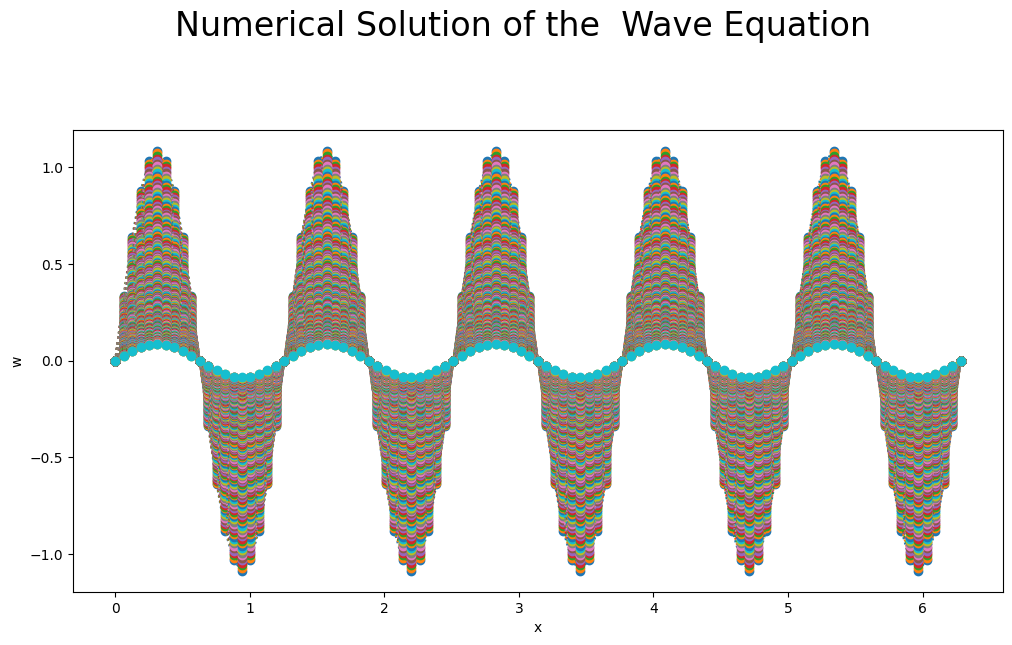

In [21]:
fig = plt.figure(figsize=(12, 6))

# plt.subplot(121)
plt.subplot(111)
for j in range(1, time_steps + 1):
    plt.plot(x, w[:, j], 'o:')
plt.xlabel('x')
#plt.xticks(np.arange(len(x)), np.round(x,3),rotation=45)
plt.ylabel('w')

# plt.subplot(122)
# plt.imshow(w.transpose(), aspect='auto')
# plt.xticks(np.arange(len(x)), np.round(x,3),rotation=45)
# plt.yticks(np.arange(len(time)), np.round(time,2))
# plt.xlabel('x')
# plt.ylabel('time')
# clb=plt.colorbar()
# clb.set_label('Temperature (w)')
plt.suptitle('Numerical Solution of the  Wave Equation' % (np.round(r, 3)),
             fontsize=24,
             y=1.08)
# fig.tight_layout()
plt.show()

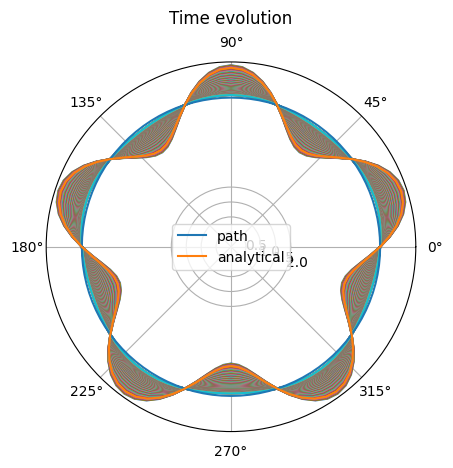

In [22]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
for j in range(1, time_steps + 1):
    ax.plot(x, amp + w[:, j])
# ax.set_rmax(2)
ax.plot(x, amp*np.ones(len(x)), label = 'path')
ax.plot(x, amp + np.sin(n*x), label = 'analytical')
ax.set_rticks([0.5, 1, 1.5, 2])  # Less radial ticks
ax.set_rlabel_position(-22.5)  # Move radial labels away from plotted line
ax.grid(True)
ax.legend()
ax.set_title("Time evolution", va='bottom')
plt.show()